In [1]:
import time
import pandas as pd
import requests
import json5
import matplotlib.pyplot as plt

# Loading national data

In [2]:
df_nat = pd.read_csv("../Data/Employment_Projections.csv").sort_values('Employment 2030',ascending=False)

# Loading CA data

In [3]:
df_CA = pd.read_csv("../Data/CA_Long_Term_Occupational_Employment_Projections.csv").sort_values('Projected Year Employment Estimate',ascending=False)

In [4]:
df_Sac = df_CA[df_CA['Area Name (County Names)']=='Sacramento--Roseville--Arden-Arcade MSA (El Dorado, Placer, Sacramento, and Yolo Counties)'].copy()

In [5]:
df_Cal = df_CA[df_CA['Area Name (County Names)']=='California'].copy()

Filtering for those occupations that make 40k a year or more and cleaning occupational code for the national table to match the california tables

In [6]:
df_Sac_40k = df_Sac[df_Sac['Median Annual Wage']>=40000].copy()

In [7]:
df_nat['Occupation Code']=df_nat['Occupation Code'].str.extract(r'([0-9]{2}-[0-9]{4})')

need to bin education levels

In [8]:
df_Sac_40k['Entry Level Education'].value_counts()

High school diploma or equivalent    108
Bachelor's degree                    103
Doctoral or professional degree       28
Associate's degree                    24
Postsecondary non-degree award        19
No formal educational credential      18
Master's degree                       18
Some college, no degree                3
Name: Entry Level Education, dtype: int64

In [9]:
education_levels = {'No formal educational credential':'<HS',
                    'High school diploma or equivalent':'HS+',
                    "Bachelor's degree":'Associates+',
                    "Associate's degree":'Associates+',
                    'Postsecondary non-degree award':'HS+',
                    'Some college, no degree':'HS+'
    
}
df_Sac['Education bin_a'] = df_Sac['Entry Level Education'].replace(to_replace=education_levels)
df_Sac_40k['Education bin_a'] = df_Sac_40k['Entry Level Education'].replace(to_replace=education_levels)
df_Cal['Education bin_a'] = df_Cal['Entry Level Education'].replace(to_replace=education_levels)

Less than HS

In [10]:
less_hs = df_Sac[df_Sac['Education bin_a']=='<HS'].sort_values(by='Projected Year Employment Estimate',ascending=False)
less_hs.head().transpose()

,9597,9892,9649,9645,9599
Area Type,Metropolitan Area,Metropolitan Area,Metropolitan Area,Metropolitan Area,Metropolitan Area
Area Name (County Names),Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...
Period,2018-2028,2018-2028,2018-2028,2018-2028,2018-2028
SOC Level,4,4,4,4,4
Standard Occupational Classification (SOC),35-3021,53-7062,41-2031,41-2011,35-3031
Occupational Title,"Combined Food Preparation and Serving Workers,...","Laborers and Freight, Stock, and Material Move...",Retail Salespersons,Cashiers,Waiters and Waitresses
Base Year Employment Estimate,24920,24130,26330,23390,15650
Projected Year Employment Estimate,30210.0,28690.0,25860.0,23140.0,17460.0
Numeric Change,5290,4560,-470,-250,1810
Percentage Change,21.2,18.9,-1.8,-1.1,11.6


In [11]:
df_Sac_40k[df_Sac_40k['Education bin_a']=='<HS'].sort_values(by='Projected Year Employment Estimate',ascending=False).head().transpose()

,9742,9749,9890,9745,9741
Area Type,Metropolitan Area,Metropolitan Area,Metropolitan Area,Metropolitan Area,Metropolitan Area
Area Name (County Names),Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...
Period,2018-2028,2018-2028,2018-2028,2018-2028,2018-2028
SOC Level,4,4,4,4,4
Standard Occupational Classification (SOC),47-2061,47-2141,53-7051,47-2081,47-2051
Occupational Title,Construction Laborers,"Painters, Construction and Maintenance",Industrial Truck and Tractor Operators,Drywall and Ceiling Tile Installers,Cement Masons and Concrete Finishers
Base Year Employment Estimate,11240,3400,2200,2270,2010
Projected Year Employment Estimate,12210.0,3860.0,2490.0,2480.0,2190.0
Numeric Change,970,460,290,210,180
Percentage Change,8.6,13.5,13.2,9.3,9.0


HS or some colege

In [12]:
hs_plus = df_Sac[df_Sac['Education bin_a']=='HS+'].sort_values(by='Projected Year Employment Estimate',ascending=False)
hs_plus.head().transpose()

,9636,9720,9738,9707,9713
Area Type,Metropolitan Area,Metropolitan Area,Metropolitan Area,Metropolitan Area,Metropolitan Area
Area Name (County Names),Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...
Period,2018-2028,2018-2028,2018-2028,2018-2028,2018-2028
SOC Level,4,4,4,4,4
Standard Occupational Classification (SOC),39-9021,43-9061,47-2031,43-5081,43-6014
Occupational Title,Personal Care Aides,"Office Clerks, General",Carpenters,Stock Clerks and Order Fillers,"Secretaries and Administrative Assistants, Exc..."
Base Year Employment Estimate,35860,30310,14310,12500,14180
Projected Year Employment Estimate,47390.0,29200.0,15920.0,13360.0,13300.0
Numeric Change,11530,-1110,1610,860,-880
Percentage Change,32.2,-3.7,11.3,6.9,-6.2


In [13]:
df_Sac_40k[df_Sac_40k['Education bin_a']=='HS+'].sort_values(by='Projected Year Employment Estimate',ascending=False).head().transpose()

,9738,9713,9675,9669,9642
Area Type,Metropolitan Area,Metropolitan Area,Metropolitan Area,Metropolitan Area,Metropolitan Area
Area Name (County Names),Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...
Period,2018-2028,2018-2028,2018-2028,2018-2028,2018-2028
SOC Level,4,4,4,4,4
Standard Occupational Classification (SOC),47-2031,43-6014,43-3031,43-1011,41-1011
Occupational Title,Carpenters,"Secretaries and Administrative Assistants, Exc...","Bookkeeping, Accounting, and Auditing Clerks",First-Line Supervisors of Office and Administr...,First-Line Supervisors of Retail Sales Workers
Base Year Employment Estimate,14310,14180,10550,9660,9650
Projected Year Employment Estimate,15920.0,13300.0,10230.0,9730.0,9700.0
Numeric Change,1610,-880,-320,70,50
Percentage Change,11.3,-6.2,-3.0,0.7,0.5


Associates plus

In [14]:
sac_degree = df_Sac[df_Sac['Education bin_a']=='Associates+'].sort_values(by='Projected Year Employment Estimate',ascending=False)
sac_degree.head().transpose()

,9307,9523,9266,9315,9313
Area Type,Metropolitan Area,Metropolitan Area,Metropolitan Area,Metropolitan Area,Metropolitan Area
Area Name (County Names),Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...
Period,2018-2028,2018-2028,2018-2028,2018-2028,2018-2028
SOC Level,4,4,4,4,4
Standard Occupational Classification (SOC),13-1111,29-1141,11-1021,13-2011,13-1199
Occupational Title,Management Analysts,Registered Nurses,General and Operations Managers,Accountants and Auditors,"Business Operations Specialists, All Other"
Base Year Employment Estimate,27320,18890,14660,12000,10080
Projected Year Employment Estimate,31200.0,22360.0,15880.0,12350.0,10870.0
Numeric Change,3880,3470,1220,350,790
Percentage Change,14.2,18.4,8.3,2.9,7.8


In [15]:
df_Sac_40k[df_Sac_40k['Education bin_a']=='Associates+'].sort_values(by='Projected Year Employment Estimate',ascending=False).head().transpose()

,9307,9523,9266,9315,9460
Area Type,Metropolitan Area,Metropolitan Area,Metropolitan Area,Metropolitan Area,Metropolitan Area
Area Name (County Names),Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...,Sacramento--Roseville--Arden-Arcade MSA (El Do...
Period,2018-2028,2018-2028,2018-2028,2018-2028,2018-2028
SOC Level,4,4,4,4,4
Standard Occupational Classification (SOC),13-1111,29-1141,11-1021,13-2011,25-2021
Occupational Title,Management Analysts,Registered Nurses,General and Operations Managers,Accountants and Auditors,"Elementary School Teachers, Except Special Edu..."
Base Year Employment Estimate,27320,18890,14660,12000,8720
Projected Year Employment Estimate,31200.0,22360.0,15880.0,12350.0,9060.0
Numeric Change,3880,3470,1220,350,340
Percentage Change,14.2,18.4,8.3,2.9,3.9


Looking at bar charts of training needed and histograms of Median Annual Wage

Text(0.5, 1.0, 'Distribution of Median Annual Salaries')

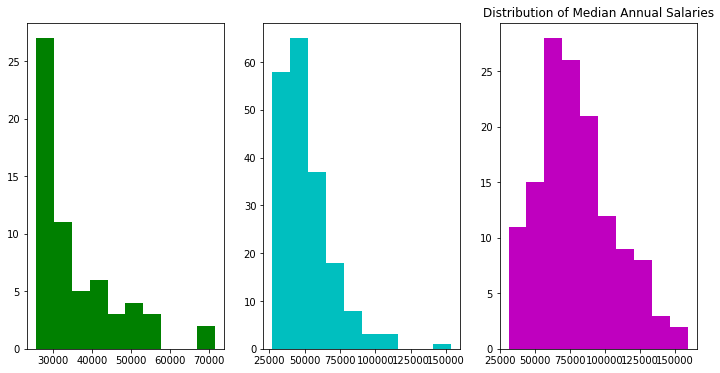

In [16]:
fig,axs = plt.subplots(1,3,figsize=(12,6))
axs[0].hist(less_hs[less_hs['Median Annual Wage']>0]['Median Annual Wage'],color='g')
axs[1].hist(hs_plus[hs_plus['Median Annual Wage']>0]['Median Annual Wage'],color='c')
axs[2].hist(sac_degree[sac_degree['Median Annual Wage']>0]['Median Annual Wage'],color='m')
plt.title('Distribution of Median Annual Salaries')

Ok, that is ugly

Text(0.5, 1.0, 'Frequencies of training needed for occupations not requiring a high school diploma')

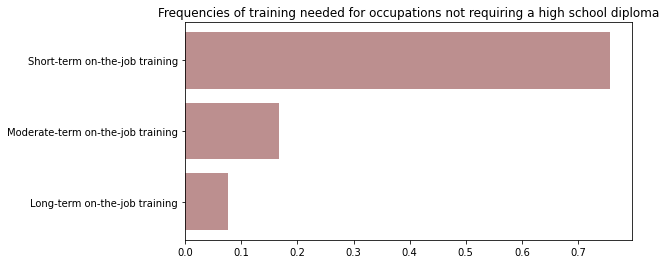

In [26]:
less_hs_counts = pd.DataFrame(less_hs['Job Training'].value_counts(normalize=True,sort=True,ascending=True,dropna=False))
less_hs_counts['training needed']=less_hs_counts.index
less_hs_counts.rename(columns={'Job Training':'frequency'}, inplace=True)
plt.figure(figsize=(8,4))
plt.barh(y='training needed',width='frequency',data=less_hs_counts,color='rosybrown')
plt.title('Frequencies of training needed for occupations not requiring a high school diploma')

Text(0.5, 1.0, 'Frequencies of training needed for occupations requiring a high school diploma')

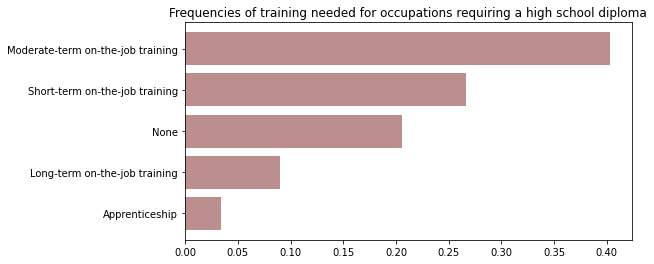

In [27]:
hs_counts = pd.DataFrame(hs_plus['Job Training'].value_counts(normalize=True,sort=True,ascending=True,dropna=False))
hs_counts['training needed']=hs_counts.index
hs_counts.rename(columns={'Job Training':'frequency'}, inplace=True)
plt.figure(figsize=(8,4))
plt.barh(y='training needed',width='frequency',data=hs_counts,color='rosybrown')
plt.title('Frequencies of training needed for occupations requiring a high school diploma')

Text(0.5, 1.0, "Frequencies of training needed for occupations requiring an associates or bachelor's degree")

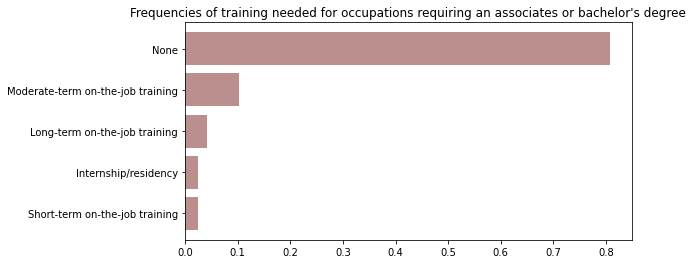

In [28]:
college_counts = pd.DataFrame(sac_degree['Job Training'].value_counts(normalize=True,sort=True,ascending=True,dropna=False))
college_counts['training needed']=college_counts.index
college_counts.rename(columns={'Job Training':'frequency'}, inplace=True)
plt.figure(figsize=(8,4))
plt.barh(y='training needed',width='frequency',data=college_counts,color='rosybrown')
plt.title("Frequencies of training needed for occupations requiring an associates or bachelor's degree")